In [2]:
import numpy as np
import timeit
import matplotlib.pyplot as plt
from scipy import linalg

# Zad 1 

In [3]:
def power_method(A, x, max_iter, epsilon):
    n = A.shape[0]
    i = 0
    x1 = A @ x
    max_elemt = 1
    while i < max_iter and np.linalg.norm(x*max_elemt - x1) > epsilon: #i tu jeszczce z tym epsilonem
        max_elemt = np.linalg.norm(x1, ord = np.inf)
        x = x1/max_elemt
        i+=1
        x1 = A @ x
    return max_elemt, x1/np.linalg.norm(x1, ord = np.inf)

def check(value, vector, X):
    value_1 = max(X[0])
    vector_1 = X[1][:,0]
    if np.isclose(value - value_1, 0):
        return True
    return False

Funkcja biblioteczna:  0.02909579999959533
Moja funkcja:  0.0010105000001203734
Różnica: 0.028085299999474955 dla N: 100
Zgodne wyniki:  True 

Funkcja biblioteczna:  0.02600299999994604
Moja funkcja:  0.0007744000004095142
Różnica: 0.025228599999536527 dla N: 200
Zgodne wyniki:  True 

Funkcja biblioteczna:  0.0562763999996605
Moja funkcja:  0.0015411000003950903
Różnica: 0.05473529999926541 dla N: 300
Zgodne wyniki:  True 

Funkcja biblioteczna:  0.10538639999958832
Moja funkcja:  0.00551880000057281
Różnica: 0.09986759999901551 dla N: 400
Zgodne wyniki:  True 

Funkcja biblioteczna:  0.24752820000048814
Moja funkcja:  0.001923700000588724
Różnica: 0.24560449999989942 dla N: 500
Zgodne wyniki:  True 

Funkcja biblioteczna:  0.3705062999997608
Moja funkcja:  0.3059490999994523
Różnica: 0.06455720000030851 dla N: 600
Zgodne wyniki:  True 

Funkcja biblioteczna:  0.5236154000003808
Moja funkcja:  0.27781190000041533
Różnica: 0.24580349999996542 dla N: 700
Zgodne wyniki:  True 

Funkcja 

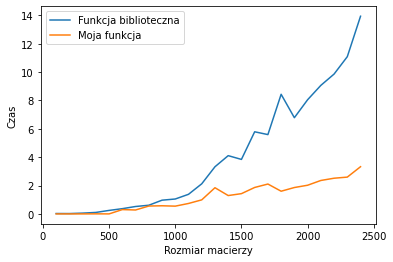

In [4]:
times1 = []
times2 = []
it = []

for i in range(100, 2500, 100):
    it.append(i)
    A2 = np.random.rand(i,i)
    A2 = A2 @ A2.T
    x2 = np.random.rand(i, 1)
    starttime = timeit.default_timer()
    X = np.linalg.eig(A2)
    time1 = timeit.default_timer()-starttime
    times1.append(time1)
    print("Funkcja biblioteczna: ", time1)
    starttime = timeit.default_timer()
    val, vec = power_method(A2, x2, 1000, 1e-10)
    time2 = timeit.default_timer()- starttime
    times2.append(time2)
    print("Moja funkcja: ", time2)
    print(f"Różnica: {abs(time1-time2)} dla N: {i}")
    print("Zgodne wyniki: ", check(val, vec, X), "\n")
    

plt.plot(it, times1, label = "Funkcja biblioteczna")
plt.plot(it, times2, label = "Moja funkcja")
plt.xlabel("Rozmiar macierzy")
plt.ylabel("Czas")
plt.legend()
plt.show()

  

Widoczna jest zależność im większy rozmiar macierzy, tym więcej czasu zajmuje wyliczenie odpowiednich wartości przez obie funkcje. Widoczne są jednak fragmenty, kiedy funkcja jest malejąca, wynika to prawdopodobnie z tego, że macierze są różne, wymagają mniej lub więcej skompilkowanych obliczeń. Analizując wykres można również stwierdzić, że funkcja napisana przeze mnie jest znacznie szybsza niż funkcja biblioteczna. Wynika to z faktu, że w metodzie potęgowej interesuje nas jedynie największa wartość własna - zmniejsza to ilość obliczeń. Może to oczywiście być wadą tej metody, szczególnie, kiedy potrzebujemy więcej własności i wektorów własnych.

# Zad 2

In [5]:
A = np.random.rand(3,3)
A = A @ A.T
x0 = np.random.rand(3)

In [9]:
def plu_solve(A, b):
    LU, P = linalg.lu_factor(A)
    return linalg.lu_solve((LU, P), b) 

Funkcja 'inverse_pm' jest bardzo podobna do funkcji z zadania 1. Przyjmuje dodatkowo parametr d (liczbę bliską do wartości własnej macierzy). W każdej iteracji rozwiązywany jest układ równań (A - d * I)x1 = x. Nastepnie wyliczany jest max_element, tak samo jak w zadaniu 1, aby móc znormalizować wyliczony wektor x1 (i od razu przypisuje go do zmiennej x). Należy pamiętać o tym, aby zwrócić jako wartość własną odpowiednią liczbę - odwrotność max_element "przesunięte" o d. 

In [10]:
def inverse_pm(A, x, d, max_iter, epsilon):
    M = A.copy()
    I = np.identity(M.shape[0]) #macierz identycznościowa
    M = M - d * I 
    i = 0
def check_for_inverse(X, vec, val):
    for value in X[0]:
        if np.isclose(val - value, 0):
            return True
    return False
    
def check_val_vec(val, vec, A):
    if np.allclose(val*vec, A@vec, atol = 1e-10):
        return True
    return False

def print_info(d):
    print("D = ", d)
    max_element = 1
    x1 = plu_solve(M, x)
    while i < max_iter and np.linalg.norm(x*max_element - x1) > epsilon: 
        max_element = np.linalg.norm(x1, ord = np.inf)
        x = x1/max_element
        x1 = plu_solve(M, x)
        i += 1 
    print(f"Liczba iteracji: {i}")
    return 1/max_element + d, x1/np.linalg.norm(x1) 

    val, vec = inverse_pm(A, x0, d, 1000, 1e-10)
    print(f'Wartość własna: {val}, wektor własny: {vec}')
    print('Warunek na bycie wektorem i wartością własną:', check_val_vec(val, vec, A))
    X = np.linalg.eig(A)
    print("Odpowiednio policzona własność: ", check_for_inverse(X, vec, val))
    print(" ")

X = np.linalg.eig(A)
print('Funkcja biblioteczna: ', X), "\n"
print_info(2)
print_info(0)
print_info(1)
print_info(10)

Funkcja biblioteczna:  (array([2.66835949, 0.33065532, 0.08569513]), array([[-0.5449694 , -0.59495193, -0.59079654],
       [-0.43752931,  0.80287111, -0.40492726],
       [-0.71524573, -0.03781784,  0.69784909]]))
D =  2
Liczba iteracji: 25
Wartość własna: 2.668359487243754, wektor własny: [0.5449694  0.43752931 0.71524573]
Warunek na bycie wektorem i wartością własną: True
Odpowiednio policzona własność:  True
 
D =  0
Liczba iteracji: 19
Wartość własna: 0.08569512602930472, wektor własny: [-0.59079654 -0.40492726  0.69784909]
Warunek na bycie wektorem i wartością własną: True
Odpowiednio policzona własność:  True
 
D =  1
Liczba iteracji: 1000
Wartość własna: 1.6693446844636606, wektor własny: [ 0.59495193 -0.80287111  0.03781784]
Warunek na bycie wektorem i wartością własną: False
Odpowiednio policzona własność:  False
 
D =  10
Liczba iteracji: 1000
Wartość własna: 17.331640512756593, wektor własny: [-0.5449694  -0.43752931 -0.71524573]
Warunek na bycie wektorem i wartością własną

Minusem tej metody jest konieczność wybrania odpowiedniej wartości d, która powinna być dobrym przybliżeniem wartości własnej. Podając nieodpowiedni argument, metoda ta może nie dać oczekiwanych wyników. Co ważne, kiedy za d podstawimy 0, otrzymujemy najmniejszą wartość własną. 

# Zad 3 

In [12]:
def inverse_pm_R(A, x, d,  max_iter, epsilon):
    I = np.identity(A.shape[0])
    i = 0
    x1 = plu_solve(A, x)
    max_element = 1
    while i < max_iter and np.linalg.norm(x - x1/max_element) > epsilon: 
        max_element = np.linalg.norm(x1, ord = np.inf)
        x = x1/max_element
        x1 = plu_solve((A - d*I), x) # znowu rozwiazuje rownanie
        d = x1.T @ A @ x1 / (x1.T@x1) #za każdą iteracją uaktualniam d zgodnie z wzorem
        i += 1 #zwiekszam i
    print(f'Liczba iteracji: {i}')
    return 1/max_element + d, x1/np.linalg.norm(x1) 

def print_info_R(d):
    print("D = ", d)
    val, vec = inverse_pm_R(A, x0, d, 1000, 1e-10)
    print(f'Wartość własna: {val}, wektor własny: {vec}')
    print('Warunek na bycie wektorem i wartością własną:', check_val_vec(val, vec, A))
    X = np.linalg.eig(A)
    print("Odpowiednio policzona własność: ", check_for_inverse(X, vec, val))
    print(" ")

X = np.linalg.eig(A)
print('Funkcja biblioteczna: ', X)
print_info_R(2.66)
print_info_R(0)
print_info_R(1)
print_info_R(0.366)

Funkcja biblioteczna:  (array([2.66835949, 0.33065532, 0.08569513]), array([[-0.5449694 , -0.59495193, -0.59079654],
       [-0.43752931,  0.80287111, -0.40492726],
       [-0.71524573, -0.03781784,  0.69784909]]))
D =  2.66
Liczba iteracji: 5
Wartość własna: 2.6683594872434084, wektor własny: [0.5449694  0.43752931 0.71524573]
Warunek na bycie wektorem i wartością własną: True
Odpowiednio policzona własność:  True
 
D =  0
Liczba iteracji: 1000
Wartość własna: 0.08569512602936172, wektor własny: [ 0.59079654  0.40492726 -0.69784909]
Warunek na bycie wektorem i wartością własną: True
Odpowiednio policzona własność:  True
 
D =  1
Liczba iteracji: 1000
Wartość własna: 0.08569512602936166, wektor własny: [-0.59079654 -0.40492726  0.69784909]
Warunek na bycie wektorem i wartością własną: True
Odpowiednio policzona własność:  True
 
D =  0.366
Liczba iteracji: 1000
Wartość własna: 0.3306553155363394, wektor własny: [-0.59495193  0.80287111 -0.03781784]
Warunek na bycie wektorem i wartością

Ta metoda jest zbieżna w każdym wypróbowanym przypadku, czyli działa lepiej niż metoda w zadaniu 2. Jednak nadal należy odpowiednio dobierać własności d, aby otrzymać wszystkie wartości własne.